<a href="https://colab.research.google.com/github/Vrajesh-code/Assignment_1-COA/blob/main/Non%20Local%20Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing Colab for Assignment
FAQ on this [doc](https://docs.google.com/document/d/1t_PoKJVkqzBQljdadJdTvNNS4AUEn4fgCxt2k34j06w/edit?usp=sharing).

## Utils

In [ ]:
def show_gray(img,title=""):
  """
  Function to show grayscale image
  """
  plt.imshow(img,cmap='gray')
  plt.title(title)

## Download the Dataset

In [ ]:
#taken from this StackOverflow answer: https://stackoverflow.com/a/39225039
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

# file_id = '1gCiAZnEiEzOsrfU97Z7lk0pjDhiBnfF0'
file_id = '1Z73UHw9IS492qxHvNUiB7-DidVl_ePfg'
destination = '/content/dataset.zip'
download_file_from_google_drive(file_id, destination)

In [ ]:

!unzip -q dataset.zip
!rm -rf dataset.zip
# Press A when you run this cell.

replace dataset/Image1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


# Assumptions
Mention all assumptions or considerations that you have made while attempting the assignment if any.


[TODO]
<!-- Write your answer below -->
Kindly press A when you run the above cell.

# Metrics
Here you need to complete the MSE and PSNR metrics formula which will be used later on to test the automated grader. Please do not change the function definitions. Else the grader will fail.

Objective: To complete the given functions for **0.6 mark** each.


In [ ]:
import numpy as np
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio

def MSE(image1,image2):
  """ 
  Mean Squared Error
  :param image1: image1
  :param image2: image2
  :rtype: float
  :return: MSE value
  """
  # TODO
  # Here I have assumed that the input image (say image1) and the test image (say image2) have the same resolution.
  mse = np.mean((image1.astype(float) - image2.astype(float))**2) # It might have been wise to normalize the image pixeles for computational efficiency. Will try it if have the time.
  return mse

def PSNR(image1, image2, peak=255):
  """ 
  Peak signal-to-noise ratio
  :param image1: image1
  :param image2: image2
  :param peak: max value of pixel 8-bit image (255)
  :rtype: float
  :return: PSNR value
  """
  # TODO
  # Here I have assumed that the input image (say image1) and the test image (say image2) have the same resolution.
  min = np.min(image1)
  max = np.max(image1)
  range = max-min
  psnr = 10*np.log10((range**2)/MSE(image1,image2))
  return psnr

In [ ]:
#@title Grader { vertical-output: true }
seed =  200#@param {type:"integer"}
# Grader, please don't touch [Can run to check] [seed will be changed later]
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio

np.random.seed(seed)
image1 = np.random.randint(0,256,(1280,720,3))
image2 = np.random.randint(0,256,(1280,720,3))

print(f"Skimage -> PSNR: {peak_signal_noise_ratio(image1,image2,data_range=255):.4f} | MSR: {mean_squared_error(image1,image2):.4f}")
print(f"My Func -> PSNR: {PSNR(image1,image2):.4f} | MSR: {MSE(image1,image2):.4f}")

Skimage -> PSNR: 7.7475 | MSR: 10922.7525
My Func -> PSNR: 7.7475 | MSR: 10922.7525


# Creating Noisy Images
***Objective:*** To complete the given class functions for **1 mark** each. 

>  MSE: To match within error of +- 200.0 \
  PSNR: To match within error of +- 2.0


## Salt n Pepper Noise
you can read about this more [here](https://en.wikipedia.org/wiki/Salt-and-pepper_noise).

## Gaussian Noise
you can read about this more [here](https://en.wikipedia.org/wiki/Gaussian_noise). 

In [ ]:
from skimage.util import random_noise
import numpy as np
import random
import cv2

class NoisySystem():
  def example(self,img,**kwargs):
    """
    An example function to test expected return.
    You can read more about skimage.util.random_noise at https://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise
    """
    noisy_image = random_noise(img,**kwargs)
    noisy_image = np.uint8(noisy_image*255)
    return noisy_image

  def create_salt_and_pepper_noise(self,img,amount=0.05):
    """
    function to create salt and pepper noise
    :param image: input image
    :rtype: uint8 (w,h)
    :return: noisy image
    
    """
    # [TODO]  
    image = np.copy(img)
    rows, columns = image.shape
    product = rows*columns
    pixels_to_be_changed = round(amount*product/2) # Here amount = 0.05. Half of them will be changed to white and half to black
    for i in range(0,pixels_to_be_changed):
      y_black = random.randint(0,rows-1)
      x_black = random.randint(0,columns-1)
      # Pixels to be changed to black

      y_white = random.randint(0,rows-1)
      x_white = random.randint(0,columns-1)
      # Pixels to be changed to white

      image[y_black][x_black] = 255
      image[y_white][x_white] = 0


    return image

  def create_gaussian_noise(self,img,mean=0,var=0.01):
    """
    function to create gaussian noise
    :param image: input image
    :rtype: uint8 (w,h)
    :return: noisy image
    """
    # [TODO]
    image = np.copy(img)
    rows, columns = image.shape
    sigma = var**0.5
    noise = 255*np.random.normal(mean, sigma, image.shape)
    image = image+noise   #Note that decreasing teh amplitude of the noise helps to reduce the MSE. But it can never be considered a gaussian distribution from 0 to 255.
    return image

Total Time taken: 0.08s

Statistics:
Example   => SNP -> PSNR: 17.80 | MSE: 1078.32
Example   => GSN -> PSNR: 20.29 | MSE: 607.59
My Func   => SNP -> PSNR: 18.01 | MSE: 1027.84
My Func   => GSN -> PSNR: 19.98 | MSE: 652.56


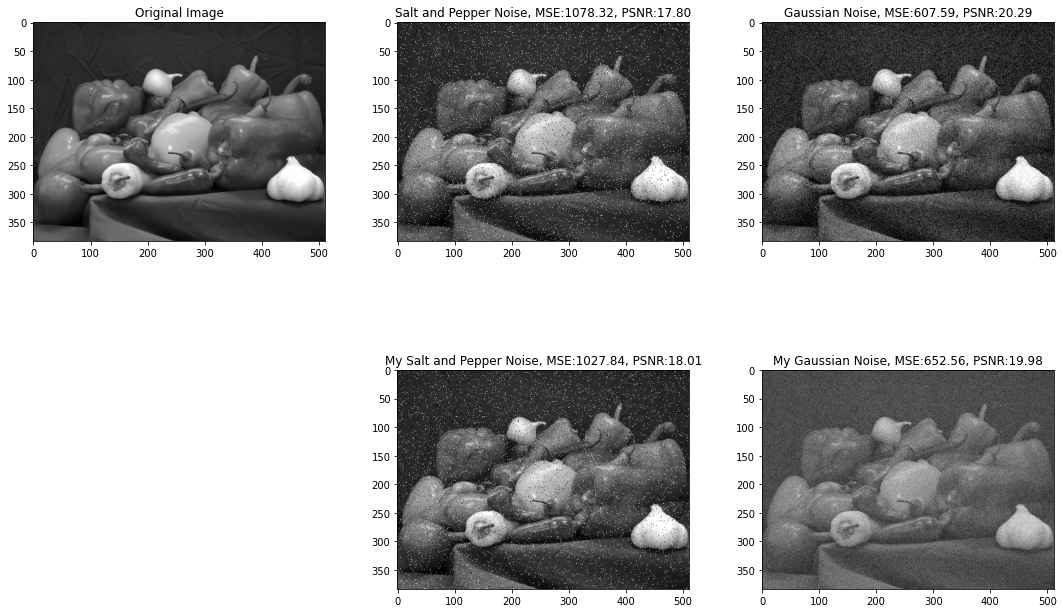

In [ ]:
#@title Grader { vertical-output: true, display-mode: "form" }
image_number = 1 #@param {type:"slider", min:1, max:10, step:1}
# Grader, please don't touch [Can run to check] [will be graded on an image decided later]
# %%timeit 
%matplotlib inline
import cv2
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

clear_output(wait=True)

start = time.time()

noise_maker               = NoisySystem()
image                     = cv2.imread(f"/content/dataset/Image{image_number}.png")
image                     = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

salt_and_pepper_example   = noise_maker.example(image.copy(),mode="s&p")
gaussian_example          = noise_maker.example(image.copy(),mode="gaussian")
salt_and_pepper_image     = noise_maker.create_salt_and_pepper_noise(image.copy())
gaussian_image            = noise_maker.create_gaussian_noise(image.copy())

end = time.time()
print(f"Total Time taken: {end-start:.2f}s\n")
print("Statistics:")
print(f"Example   => SNP -> PSNR: {PSNR(salt_and_pepper_example,image):.2f} | MSE: {MSE(salt_and_pepper_example,image):.2f}")
print(f"Example   => GSN -> PSNR: {PSNR(gaussian_example,image):.2f} | MSE: {MSE(gaussian_example,image):.2f}")
print(f"My Func   => SNP -> PSNR: {PSNR(salt_and_pepper_image,image):.2f} | MSE: {MSE(salt_and_pepper_image,image):.2f}")
print(f"My Func   => GSN -> PSNR: {PSNR(image,gaussian_image):.2f} | MSE: {MSE(gaussian_image,image):.2f}")


fig = plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
show_gray(image,"Original Image")
plt.subplot(2,3,2)
show_gray(salt_and_pepper_example,
          f"Salt and Pepper Noise, MSE:{MSE(image,salt_and_pepper_example):.2f}, PSNR:{PSNR(image,salt_and_pepper_example):.2f}")
plt.subplot(2,3,3)
show_gray(gaussian_example,
          f"Gaussian Noise, MSE:{MSE(image,gaussian_example):.2f}, PSNR:{PSNR(image,gaussian_example):.2f}")
plt.subplot(2,3,5)
show_gray(salt_and_pepper_image,
          f"My Salt and Pepper Noise, MSE:{MSE(image,salt_and_pepper_image):.2f}, PSNR:{PSNR(image,salt_and_pepper_image):.2f}")
plt.subplot(2,3,6)
show_gray(gaussian_image,
          f"My Gaussian Noise, MSE:{MSE(image,gaussian_image):.2f}, PSNR:{PSNR(image,gaussian_image):.2f}")
fig.tight_layout()
plt.show()

# Non Local Means **4 marks**

***Primary Objective:*** To complete Non Local Means denoiser. **2 marks** for completetion.

***Secondary Objective:*** 
1. To optimise for **MSE**. (out of 1 mark *relatively*)
2. To optimise for **time**.  (out of 1 mark *relatively*)

In [ ]:
class NLMeans():
  """
  Non Local Means, do not change the solve function. You may add any other class 
  functions or other functions in the colab file. but refrain from changing 
  function/class definitions already given. These will be used to grade later on.
  """
  def example(self,img,**kwargs):
    denoised_image = cv2.fastNlMeansDenoising(img,**kwargs)
    return denoised_image

  def neighbour_matrix(self, x, y, window, img):
    h, w, c = img.shape
    size = window//2
    neighbourhood = np.zeros((window, window, c))
    x_min, x_max = max(0, x-size), min(w, x+size+1)
    y_min, y_max = max(0, y-size), min(h, y+size+1)

    # Get the correct size of neighbourhood submatrix
    neighbourhood[size - (y-y_min):size + (y_max-y), size - (x-x_min):size + (x_max-x)] = img[y_min:y_max, x_min:x_max]

    return neighbourhood
  

  def neighbour_7(self,small_window,big_window,Denoise,Padded,Height, Width):
    ans=np.zeros((Height+big_window-1,Width+big_window-1,small_window,small_window))  #making an array that initializes the 7*7 neighbourhood initially 0

    for i in range(Height+big_window-1):
      for j in range(Width+big_window-1):

        temp=np.zeros((small_window,small_window))
        temp=Padded[i:i+small_window,j:j+small_window]
        ans[i,j]=np.squeeze(temp)
    
    return ans

  def solve(self,img,h=30,small_window=7,big_window=21):
    """
    Solve function to perform nlmeans filtering.

    :param img: noisy image
    :param h: sigma h (as mentioned in the paper)
    :param small_window: size of small window
    :param big_window: size of big window
    :rtype: uint8 (w,h)
    :return: solved image
    """

    denoised = np.copy(img)                  
    height, width = denoised.shape             #getting the submatrix

    padding=(small_window//2) + (big_window//2) 
    padded_image=np.pad(denoised,padding)             #making a padded image


    out=np.zeros((height,width))              
    neighbour_7 = self.neighbour_7(small_window, big_window, denoised, padded_image, height, width)  #get the 7x7 neighbourhood in the padded image for all pixels

    image_flatten = np.reshape(neighbour_7, (height+big_window-1, width+big_window-1, small_window*small_window)) #converting 7*7 is to vector of 49.

    for i in range(height):
      for j in range(width):

        i_shifted, j_shifted = i + (big_window//2), j + (big_window//2)      #shifting to actual co-ordinates

        pixel_i=image_flatten[i:i+big_window,j:j+big_window]                 #making big_window of 21*21
        pixel_j=neighbour_7[i_shifted,j_shifted].flatten()

        exp_term = np.exp(-np.sqrt(np.sum(np.square(np.subtract(pixel_i, pixel_j)), axis=2))/(h**2))  #calculating the exponential term

        sum = np.sum(exp_term)                       

        average_pixel = np.squeeze(self.neighbour_matrix(j_shifted+((small_window-1)//2), i_shifted+((small_window-1)//2), big_window, padded_image[:, :, None])) #calculating the average pixel value

        # Calculate the final numerator of weight of pixel i
        NLM = np.sum(exp_term*average_pixel)

        # Storing final NL value in output matrix
        out[i, j] = NLM/sum
    return out
    # [TODO]
    
    #return img

# [TODO]
# Will be checked on image 3.
# Report your best salt_and_paper_h: 10
# Report your best gaussian_h: 9

(Inbuilt) Time taken: 0.20s

(My function) Time taken: 15.67s

Statistics:
salt_and_paper_h: 10 , gaussian_h: 9

Noisy   => SNP -> PSNR: 17.83 | MSE: 1070.73
Noisy   => GSN -> PSNR: 20.49 | MSE: 580.71
Skimage => SNP -> PSNR: 17.92 | MSE: 1049.80
Skimage => GSN -> PSNR: 20.63 | MSE: 562.86
My Func => SNP -> PSNR: 23.68 | MSE: 244.34
My Func => GSN -> PSNR: 26.52 | MSE: 139.20



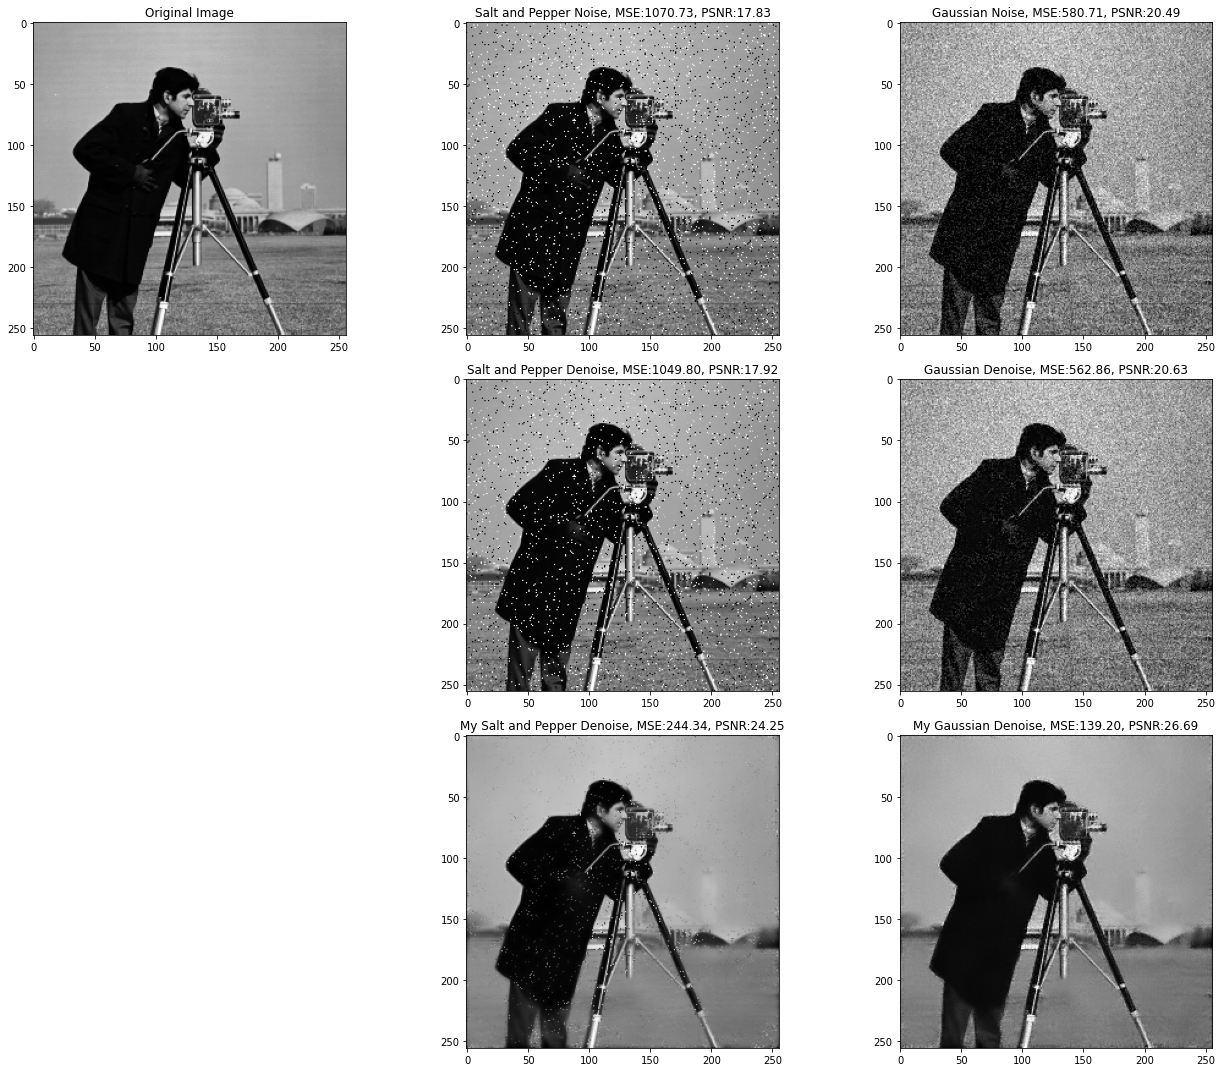

In [ ]:
#@title Grader { vertical-output: true, display-mode: "form" }
image_number = 3 #@param {type:"slider", min:1, max:10, step:1}
salt_and_paper_h =   10#@param {type:"integer"}
gaussian_h = 9        #@param {type:"integer"}
 
# Grader, please don't touch [Can run to check] [will be graded on an image decided later]
# %%timeit 
%matplotlib inline
import cv2
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
 
clear_output(wait=True)
 
 
denoiser                    = NLMeans()
image                       = cv2.imread(f"/content/dataset/Image{image_number}.png")
image                       = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
salt_and_pepper_example     = noise_maker.example(image.copy(),mode="s&p")
gaussian_example            = noise_maker.example(image.copy(),mode="gaussian")
 
start = time.time()
 
salt_and_pepper_denoise     = denoiser.example(salt_and_pepper_example.copy(),h=salt_and_paper_h)
gaussian_denoise            = denoiser.example(gaussian_example.copy(),h=gaussian_h)
 
end = time.time()
print(f"(Inbuilt) Time taken: {end-start:.2f}s\n")
 
start = time.time()
 
my_salt_and_pepper_denoise  = denoiser.solve(salt_and_pepper_example.copy(),h=salt_and_paper_h)
my_gaussian_denoise         = denoiser.solve(gaussian_example.copy(),h=gaussian_h)
 
end = time.time()
print(f"(My function) Time taken: {end-start:.2f}s\n")
 
print("Statistics:")
print(f"salt_and_paper_h: {salt_and_paper_h} , gaussian_h: {gaussian_h}\n")
print(f"Noisy   => SNP -> PSNR: {PSNR(salt_and_pepper_example,image):.2f} | MSE: {MSE(salt_and_pepper_example,image):.2f}")
print(f"Noisy   => GSN -> PSNR: {PSNR(gaussian_example,image):.2f} | MSE: {MSE(gaussian_example,image):.2f}")
print(f"Skimage => SNP -> PSNR: {PSNR(salt_and_pepper_denoise,image):.2f} | MSE: {MSE(salt_and_pepper_denoise,image):.2f}")
print(f"Skimage => GSN -> PSNR: {PSNR(gaussian_denoise,image):.2f} | MSE: {MSE(gaussian_denoise,image):.2f}")
print(f"My Func => SNP -> PSNR: {PSNR(my_salt_and_pepper_denoise,image):.2f} | MSE: {MSE(my_salt_and_pepper_denoise,image):.2f}")
print(f"My Func => GSN -> PSNR: {PSNR(my_gaussian_denoise,image):.2f} | MSE: {MSE(my_gaussian_denoise,image):.2f}\n")
 
fig = plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
show_gray(image,"Original Image")
plt.subplot(3,3,2)
show_gray(salt_and_pepper_example,
          f"Salt and Pepper Noise, MSE:{MSE(image,salt_and_pepper_example):.2f}, PSNR:{PSNR(image,salt_and_pepper_example):.2f}")
plt.subplot(3,3,3)
show_gray(gaussian_example,
          f"Gaussian Noise, MSE:{MSE(image,gaussian_example):.2f}, PSNR:{PSNR(image,gaussian_example):.2f}")
plt.subplot(3,3,5)
show_gray(salt_and_pepper_denoise,
          f"Salt and Pepper Denoise, MSE:{MSE(image,salt_and_pepper_denoise):.2f}, PSNR:{PSNR(image,salt_and_pepper_denoise):.2f}")
plt.subplot(3,3,6)
show_gray(gaussian_denoise,
          f"Gaussian Denoise, MSE:{MSE(image,gaussian_denoise):.2f}, PSNR:{PSNR(image,gaussian_denoise):.2f}")
plt.subplot(3,3,8)
show_gray(my_salt_and_pepper_denoise,
          f"My Salt and Pepper Denoise, MSE:{MSE(image,my_salt_and_pepper_denoise):.2f}, PSNR:{PSNR(image,my_salt_and_pepper_denoise):.2f}")
plt.subplot(3,3,9)
show_gray(my_gaussian_denoise,
          f"My Gaussian Denoise, MSE:{MSE(image,my_gaussian_denoise):.2f}, PSNR:{PSNR(image,my_gaussian_denoise):.2f}")
fig.tight_layout()
plt.show()

### Methodology **0.5 mark**
Explain the methodology of your non-Local means algorithm in detail. 

[TODO]
<!-- Write your answer below. -->
Denoising methods are the ones that recover original image from noise.
The Non-Local Means Algorithm is an alogorithm that takes the average or mean of all the pixels and compare it with the target pixel. Since we loop over the all the pixels of the image, we assign weights to every pixel. These weights are assigned by comparing the similarity between the target pixel and all other filters. More precisely, instead of comparing just a single pixel, a small_window of size small_window x small_window is compared. The weights are exponential functions and their values depend on sigma_h. For reducing the time complexity, a search window is defined within which the every pixel is compared. Hence it is assumed that the weights of target pixels outside search window are negligible. 

Firstly the image is padded so that each pixel has 7x7 and 21x21 neighbourhood. Hence the thickness of the padding on each side is 13. Now, we iterate though all the pixels of the image. For each pixel i, there are 21×21 = 441
j’s (the pixels in the search window). For each pixel j in the search window, there is another neighbourhood of 7x7. Now, we calculate the weights corresponding to each pair of (i, j). Finally, we get a value of each target pixels using the weights calculated. This is the output value of that pixel.

### Your understanding of the sigma\_h, small\_window and big\_window parameters **0.5 mark**

[TODO]
<!-- Write your answer below. -->
**Sigma_h**
The sigma_h has to do with the decay of exponential(weight) functions. If the value of h(which is same is sigma_h) is higher, then the dependence of the given weight decreases on the farther pixels. If the value of h is smaller than the dependence of the given weight increases on the farther pixels. Sigma_h, also known as the filtering parameter has its default value 10*sigma, for a given noisy image with standard devialtion sigma.

**Small_window**
The default value of this parameter in the paper is 7(it is optimum for image to be robust to noise and take care of fine details). It denotes the size of a sliding window(small_window x small_window) over which we will compute the average value of the pixel. Taking smaller value os small_window may reduce its robustness towards noise and bigger values may lose out on minute details of the image.

**Big_window**
The default value of this parameter in the paper is 21. It denotes the side of the search window(big_window x big_window) over which we are searching for similarity. Rather than calculating the distance of the average of the current pixel with every other pixel in the image, we calculate its distance with every pixel inside the search window.

### Metrics (MSE and PSNR) obtained **0.5 mark**
Report the metrics (MSE and PSNR) obtained for both the denoising methods for all the 10 images tabulated properly. You may use something like [this](https://www.tablesgenerator.com/markdown_tables) to generate the tables. Alternatively (not preferred), you may attach a screenshot of a table created elsewhere.

[TODO]
<!-- Write your answer below. -->
| Image number | Type of Noise | Noisy Image | Noisy Image | Denoised using NLM | Denoised using NLM | Denoised using NLM | Denoised using Gaussian filtering | Denoised using Gaussian filtering | Denoised using Gaussian filtering |
|:------------:|:-------------:|:-----------:|:-----------:|:------------------:|:------------------:|:------------------:|:---------------------------------:|:---------------------------------:|:---------------------------------:|
|              |               |     PSNR    |     MSE     |        PSNR        |         MSE        |        Time        |                PSNR               |                MSE                |                Time               |
|              |               |             |             |                    |                    |                    |                                   |                                   |                                   |
|       1      |      SNP      |    18.01    |   1028.79   |        27.91       |     **102.15**     |        48.36       |               27.77               |               107.83              |               0.002               |
|              |      GSN      |    24.59    |    531.02   |        31.1        |        58.6        |                    |               31.51               |             **55.93**             |                                   |
|       2      |      SNP      |    18.17    |    991.88   |        22.70       |       312.91       |       31.3684      |               26.42               |             **136.92**            |               0.0034              |
|              |      GSN      |    24.50    |    529.12   |        26.11       |       174.09       |                    |               29.53               |             **83.64**             |                                   |
|       3      |      SNP      |    18.19    |    986.84   |        24.12       |     **232.86**     |       15.6548      |               23.02               |               278.08              |               0.0022              |
|              |      GSN      |    24.96    |    526.34   |        29.75       |     **119.64**     |                    |               25.16               |               224.38              |                                   |
|       4      |      SNP      |    17.82    |   1073.40   |        25.81       |     **151.83**     |       18.7570      |               24.71               |               175.85              |               0.0027              |
|              |      GSN      |    24.93    |    530.44   |        29.37       |      **88.11**     |                    |               27.45               |               116.42              |                                   |
|       5      |      SNP      |    16.72    |   1382.53   |        27.25       |     **117.91**     |       46.1696      |               26.54               |               143.17              |               0.0036              |
|              |      GSN      |    25.37    |    526.67   |        33.95       |      **31.04**     |                    |               32.43               |               51.70               |                                   |
|       6      |      SNP      |    18.02    |   1026.89   |        22.61       |       336.76       |       15.4457      |               22.97               |             **300.79**            |               0.0018              |
|              |      GSN      |    24.40    |    525.87   |        27.66       |     **158.49**     |                    |               25.16               |               232.82              |                                   |
|       7      |      SNP      |    17.12    |   1261.88   |        24.44       |       231.43       |       11.5377      |               25.30               |             **191.88**            |               0.0008              |
|              |      GSN      |    25.04    |    526.61   |        29.29       |       111.16       |                    |               28.76               |             **104.89**            |                                   |
|       8      |      SNP      |    16.76    |   1371.80   |        28.37       |      **91.35**     |      448.4729      |               26.92               |               131.11              |               0.0132              |
|              |      GSN      |    25.47    |    527.42   |        39.70       |      **8.49**      |                    |               33.45               |               40.49               |                                   |
|       9      |      SNP      |    17.62    |   1125.11   |        27.69       |     **109.03**     |       46.7604      |               26.80               |               135.72              |               0.0021              |
|              |      GSN      |    25.75    |    523.90   |        32.50       |      **50.36**     |                    |               30.73               |               73.33               |                                   |
|      10      |      SNP      |    18.39    |    941.89   |        21.08       |       376.95       |       74.2333      |               24.76               |             **192.63**            |               0.0045              |
|              |      GSN      |    24.55    |    526.88   |        25.19       |       226.46       |                    |               26.79               |             **142.17**            |                                   |

### Comments on your observations about which method proves better for different noise types **0.5 mark**

[TODO]
<!-- Write your answer below. -->
As it can be seen from the above table that in case of Salt and Pepper noise, the MSE in 6/10 images is lesser in case of NLMeans denoising method. Hence one can conclude that the NLMeans algorithm is better in terms of accuracy when there is salt and pepper noise. However when it comes to time, the gaussian filtering is much better than the NLMeans. 

For Gaussian noise, the NLMeans has MSE less than Gaussian filtering for 6/10 images. Hence one may conclude that NLMeans can be used for denoising the gaussian noise. However the time it takes to denoise the image is much less in Gaussian filtering method. Hence, it may be wise to use Gaussian denoising. 

# Gaussian Filtering Comparison

***Objective:*** Show comparison between NL Means denoising and Gaussian Denoising.  **0.8 mark**


Show proper comparison for both the metrics (MSE and PSNR) for all of the images. Code will be checked on a random image.

In [ ]:
class GaussianFilter():
  """
  GaussianFilter, donot change the solve function. You may add any other class 
  functions or other functions in the colab file. but refrain for function/class
  definitions already given. These will be used to grade later on.
  """

  def solve(self, img, ksize=(5,5), sigma_x=0):
    """
    Solve function to perform gaussian filtering.

    :param img: noisy image
    :param ksize: representing the size of the kernel.
    :param sigma_x: standard deviation in X direction
    :rtype: uint8 (w,h)
    :return: solved image
    """
    # [TODO] Can use cv2 inbuilt 
    return cv2.GaussianBlur(img,ksize,sigma_x)
    
    #return img

In [ ]:
import csv
def comp_gaussian_saltpepper(salt_and_paper_h,gaussian_h,image_number):

  nonlocalmeans_denoiser = NLMeans()
  gaussian_denoiser = GaussianFilter()


  image = cv2.imread(f"/content/dataset/Image{image_number}.png")
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


  salt_and_pepper_image = noise_maker.create_salt_and_pepper_noise(image.copy())
  gaussian_image        = noise_maker.create_gaussian_noise(image.copy())

# Measuring time for NLMeans algorithm
  print(f"Start of NLM denoising for image {image_number}...")
  start = time.time()
  nlm_salt_and_pepper_denoise = nonlocalmeans_denoiser.solve(salt_and_pepper_image.copy(),h=salt_and_paper_h)
  nlm_gaussian_denoise        = nonlocalmeans_denoiser.solve(gaussian_image.copy(),h=gaussian_h)
  end = time.time()
  print(f"End NLM denoising for image {image_number} in {end-start:.4f}s.")

 # Measuring time for Gaussian Filtering
  print(f"Start of Gaussian Filtering for image {image_number}...")
  start = time.time()
  gsf_salt_and_pepper_denoise = gaussian_denoiser.solve(salt_and_pepper_image.copy())
  gsf_gaussian_denoise        = gaussian_denoiser.solve(gaussian_image.copy())
  end = time.time()
  print(f"End of Gaussian Filtering for image {image_number} in {end-start:.4f}s")


  print(f"Noisy   => SNP -> PSNR: {PSNR(salt_and_pepper_image,image):.2f} | MSE: {MSE(salt_and_pepper_image,image):.2f}")
  print(f"Noisy   => GSN -> PSNR: {PSNR(gaussian_image,image):.2f} | MSE: {MSE(gaussian_image,image):.2f}")
  print(f"NLM     => SNP -> PSNR: {PSNR(nlm_salt_and_pepper_denoise,image):.2f} | MSE: {MSE(nlm_salt_and_pepper_denoise,image):.2f}")
  print(f"NLM     => GSN -> PSNR: {PSNR(nlm_gaussian_denoise,image):.2f} | MSE: {MSE(nlm_gaussian_denoise,image):.2f}")
  print(f"GSF     => SNP -> PSNR: {PSNR(gsf_salt_and_pepper_denoise,image):.2f} | MSE: {MSE(gsf_salt_and_pepper_denoise,image):.2f}")
  print(f"GSF     => GSN -> PSNR: {PSNR(gsf_gaussian_denoise,image):.2f} | MSE: {MSE(gsf_gaussian_denoise,image):.2f}\n")
 

In [ ]:
comp_gaussian_saltpepper(10,9,3)

Start of NLM denoising for image 3...
End NLM denoising for image 3 in 15.8094s.
Start of Gaussian Filtering for image 3...
End of Gaussian Filtering for image 3 in 0.0027s
Noisy   => SNP -> PSNR: 18.16 | MSE: 993.13
Noisy   => GSN -> PSNR: 24.52 | MSE: 649.94
NLM     => SNP -> PSNR: 24.09 | MSE: 229.99
NLM     => GSN -> PSNR: 30.18 | MSE: 131.95
GSF     => SNP -> PSNR: 23.36 | MSE: 277.21
GSF     => GSN -> PSNR: 25.42 | MSE: 232.15

